In [1]:
import pandas as pd
import numpy as np
import nltk


In [2]:
time = '20170901_08a'
key_words = ['registration', 'transcript', 'verification', 'diploma', 'graduation', 'degree', 'record', 'waitlist', 'wait-list', 'wait list', 'schedule', 'drop', 'add']
df = pd.DataFrame.from_csv('NA_ALL_' + time + '.csv', encoding = "ISO-8859-1")
registrar_df = pd.DataFrame.from_csv('active_students_' + time + '.csv')


In [3]:
len(df)
df.columns
registrar_df.columns
# Number respondents to survey
len(df['Completed_Time'].dropna())

7058

In [4]:
# Number of students responded to survey and number of students in registrar
students = df[df['PRIMARY_ROLE'] == 'Student']
len(students[students['Completed_Time'].notnull()])
len(registrar_df)


7254

In [5]:
registrar_df = registrar_df.reset_index()
len(registrar_df)

7254

In [6]:
# break out students with multiple majors to different rows
major1_df = registrar_df[["NetID", "Major 1", "Matriculation Term", "Home Department/College"]]
major1_df.columns = ["NetID", "Major", "Matriculation Term", "Home Department/College"]

major2_df = registrar_df[["NetID", "Major 2", "Matriculation Term", "Home Department/College"]]
major2_df.columns = ["NetID", "Major", "Matriculation Term", "Home Department/College"]

major3_df = registrar_df[["NetID", "Major 3", "Matriculation Term", "Home Department/College"]]
major3_df.columns = ["NetID", "Major", "Matriculation Term", "Home Department/College"]

major4_df = registrar_df[["NetID", "Major 4", "Matriculation Term", "Home Department/College"]]
major4_df.columns = ["NetID", "Major", "Matriculation Term", "Home Department/College"]

big_major_df = major1_df\
                .append(major2_df)\
                .append(major3_df)\
                .append(major4_df)

big_major_df = big_major_df[big_major_df["Major"].notnull()]
len(big_major_df)

7724

In [7]:

merge_df = df.merge(big_major_df, how='right', right_on='NetID', left_on='NetID')
len(merge_df)

merge_df[merge_df['Major'] == 'Business Administration'].head()

,PRIMARY_ROLE,REPORTING_UNIT,DIVISION,STUDENT_COLL_DEPT,FULL_NAME,HOME_LINE1,HOME_LINE2,HOME_LINE3,HOME_CITY,HOME_STATE,...,CAMPUS_ADDRESS,CAMPUS_PHONE1,CAMPUS_PHONE2,RICE_EMAIL_ADDRESS,PERS_EMAIL_ADDRESS,PIDM,NA_Completed,Major,Matriculation Term,Home Department/College
20,Student,GR,NaN,Management,"Akram, Asad",9396 Farmingdale Ct,NaN,NaN,Great Falls,VA,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Business Administration,Fall 17,Management
21,Student,GR,NaN,Management,"Abbasi, Ahmed A.","3505 Sage Rd, 2708",NaN,NaN,HOUSTON,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Business Administration,Fall 15,Management
32,Student,GR,NaN,Management,"Becerril, Angel A.",150 Sabine St Apt 450,NaN,NaN,Houston,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Business Administration,Fall 17,Management
33,Student,GR,NaN,Management,"Bucheler, Andreas A.",9714 Kit St,NaN,NaN,Houston,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Business Administration,Fall 17,Management
50,Student,GR,NaN,Management,"Mangual, Adrienne A.",2218 Eclipse St,NaN,NaN,Houston,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Business Administration,Fall 17,Management


In [8]:
housing_dmg = 'WATER_DAMAGE'
vehicle_dmg = 'VEHICLE_DAMAGE'
has_wifi = "INTERNET_AVAIL"
has_power = "POWER_AVAIL"
has_phone = 'PHONE_AVAIL'
road_access = 'ROAD_STATUS'
road_access_mapping = {'Passable': 0, 'Continuous Standing Water': 1, 'Periodic Standing Water': 2}

In [9]:
import matplotlib.pyplot as plt
housing_dmg_df = merge_df[merge_df[housing_dmg] == 'Yes']
housing_dmg_df["Major"].value_counts()
type(housing_dmg_df["Major"].value_counts())

pandas.core.series.Series

In [32]:
def find_percentages(key, merge_df):
    test = merge_df[key].value_counts(sort=True, ascending=False)
    plt.figure()
    housing_dmg_perc = (merge_df[merge_df[housing_dmg] == 'Yes'][key].value_counts() / test).sort_values(ascending=True).dropna().plot.barh(figsize=(20,20))
    housing_dmg_perc.set_ylabel(key)
    housing_dmg_perc.set_xlabel("Percentage")
    housing_dmg_perc.set_title("Housing Damage as percent of " + key)
    plt.figure()
    vehicle_dmg_perc = (merge_df[merge_df[vehicle_dmg] == 'Yes'][key].value_counts() / test).sort_values(ascending=True).dropna().plot.barh(figsize=(20,20))
    vehicle_dmg_perc.set_ylabel(key)
    vehicle_dmg_perc.set_xlabel("Percentage")
    vehicle_dmg_perc.set_title("Vehicle Damage as percent of " + key)
    plt.figure()
    no_wifi = (merge_df[merge_df[has_wifi] == 'No'][key].value_counts() / test).sort_values(ascending=True).dropna().plot.barh(figsize=(20,20))
    no_wifi.set_ylabel(key)
    no_wifi.set_xlabel("Percentage")
    no_wifi.set_title("No wifi as percent of " + key)
    plt.figure()
    no_power = (merge_df[merge_df[has_power] == 'No'][key].value_counts() / test).sort_values(ascending=True).dropna().plot.barh(figsize=(20,20))
    plt.figure()
    no_power.set_ylabel(key)
    no_power.set_xlabel("Percentage")
    no_power.set_title("No power as percent of " + key)
    ax = test[::-1].plot.barh(figsize=(20, 20))
    ax.set_ylabel(key)
    ax.set_xlabel("Count")
    ax.set_title("Total n by " + key)
    plt.show()

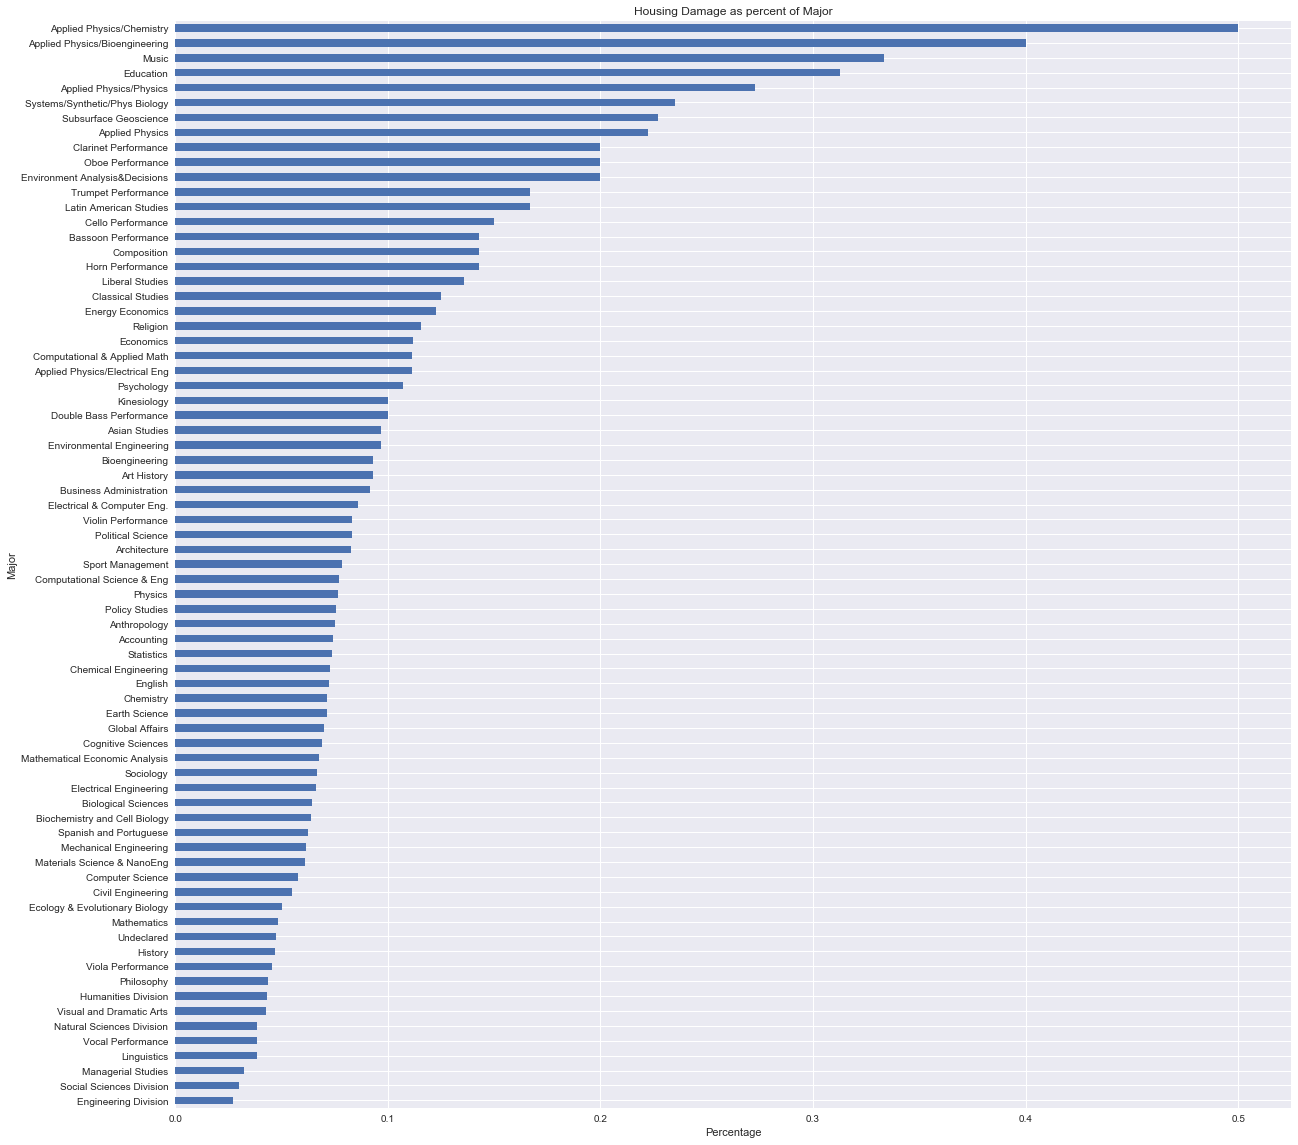

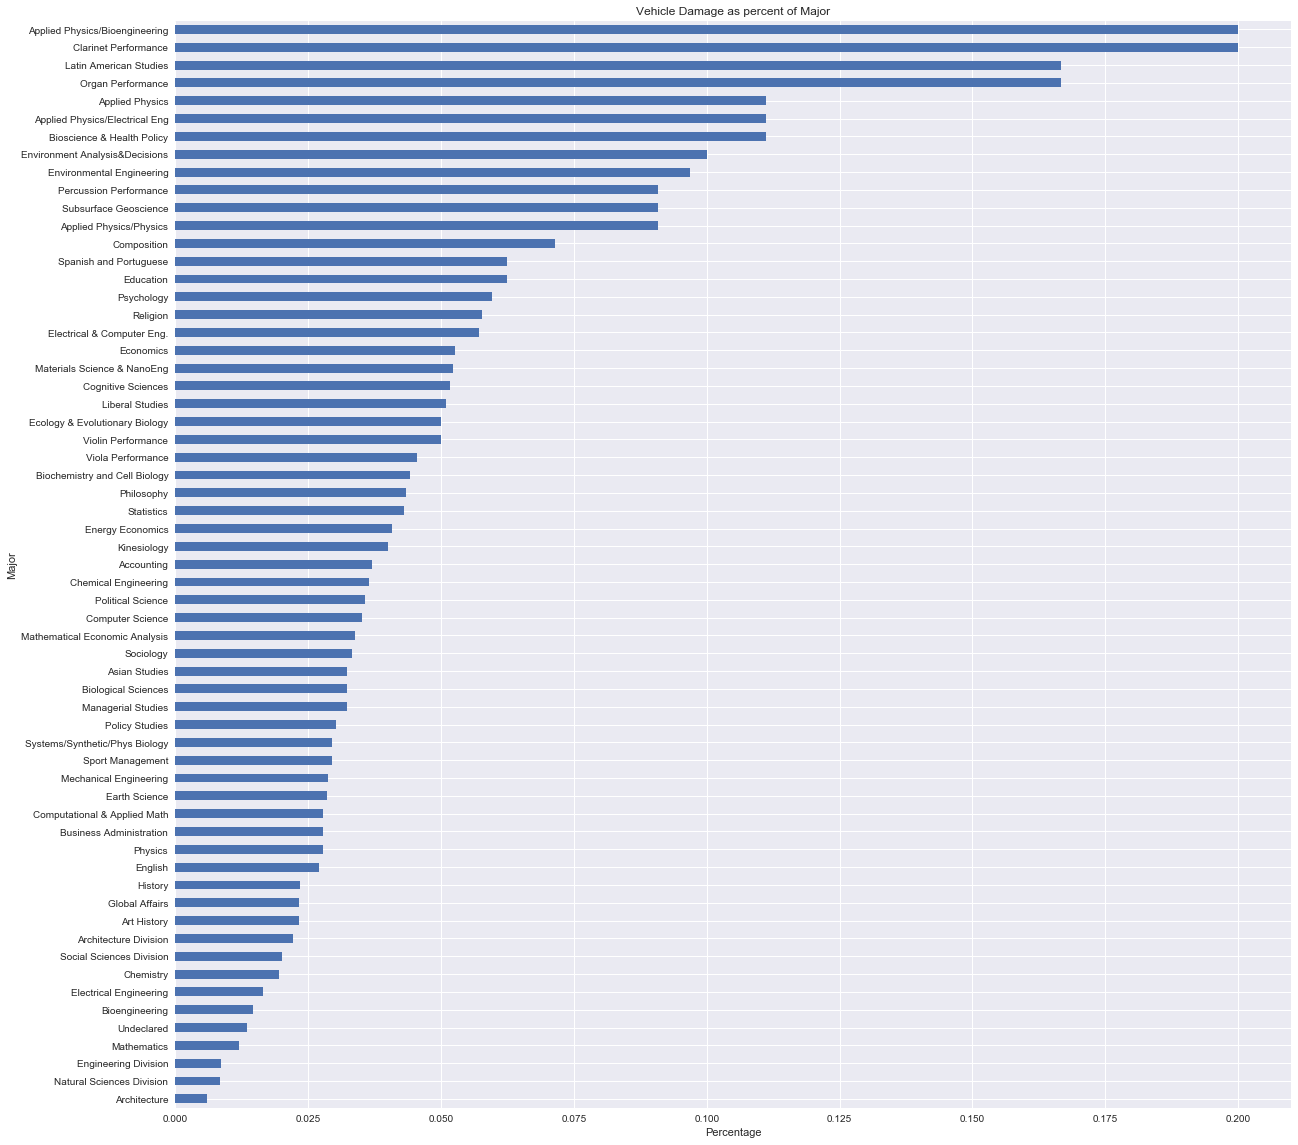

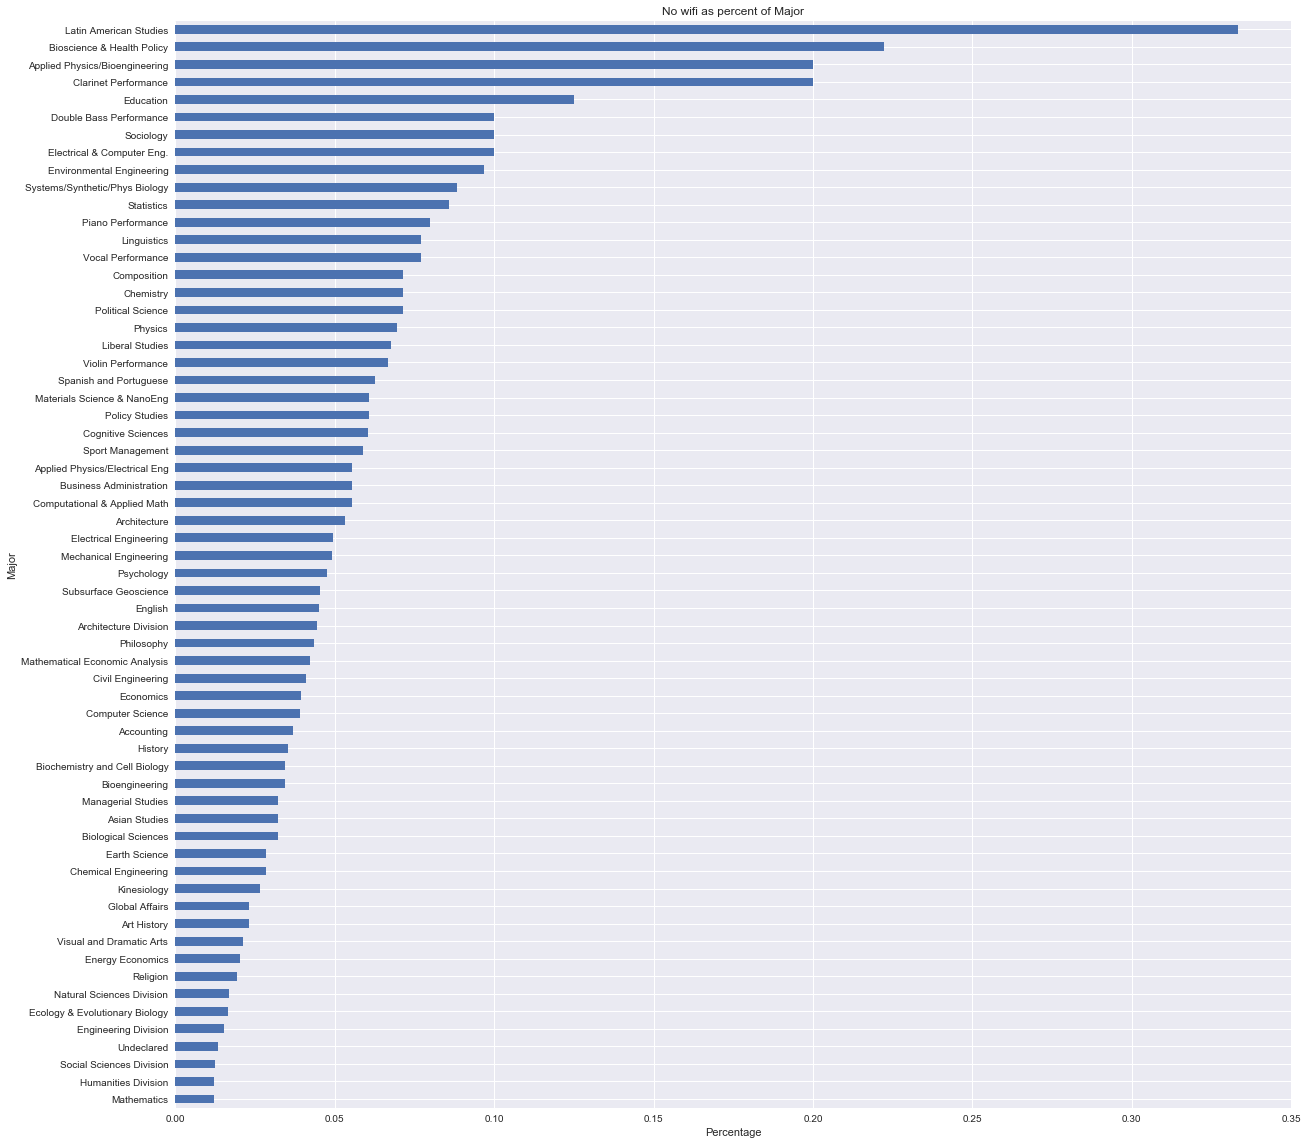

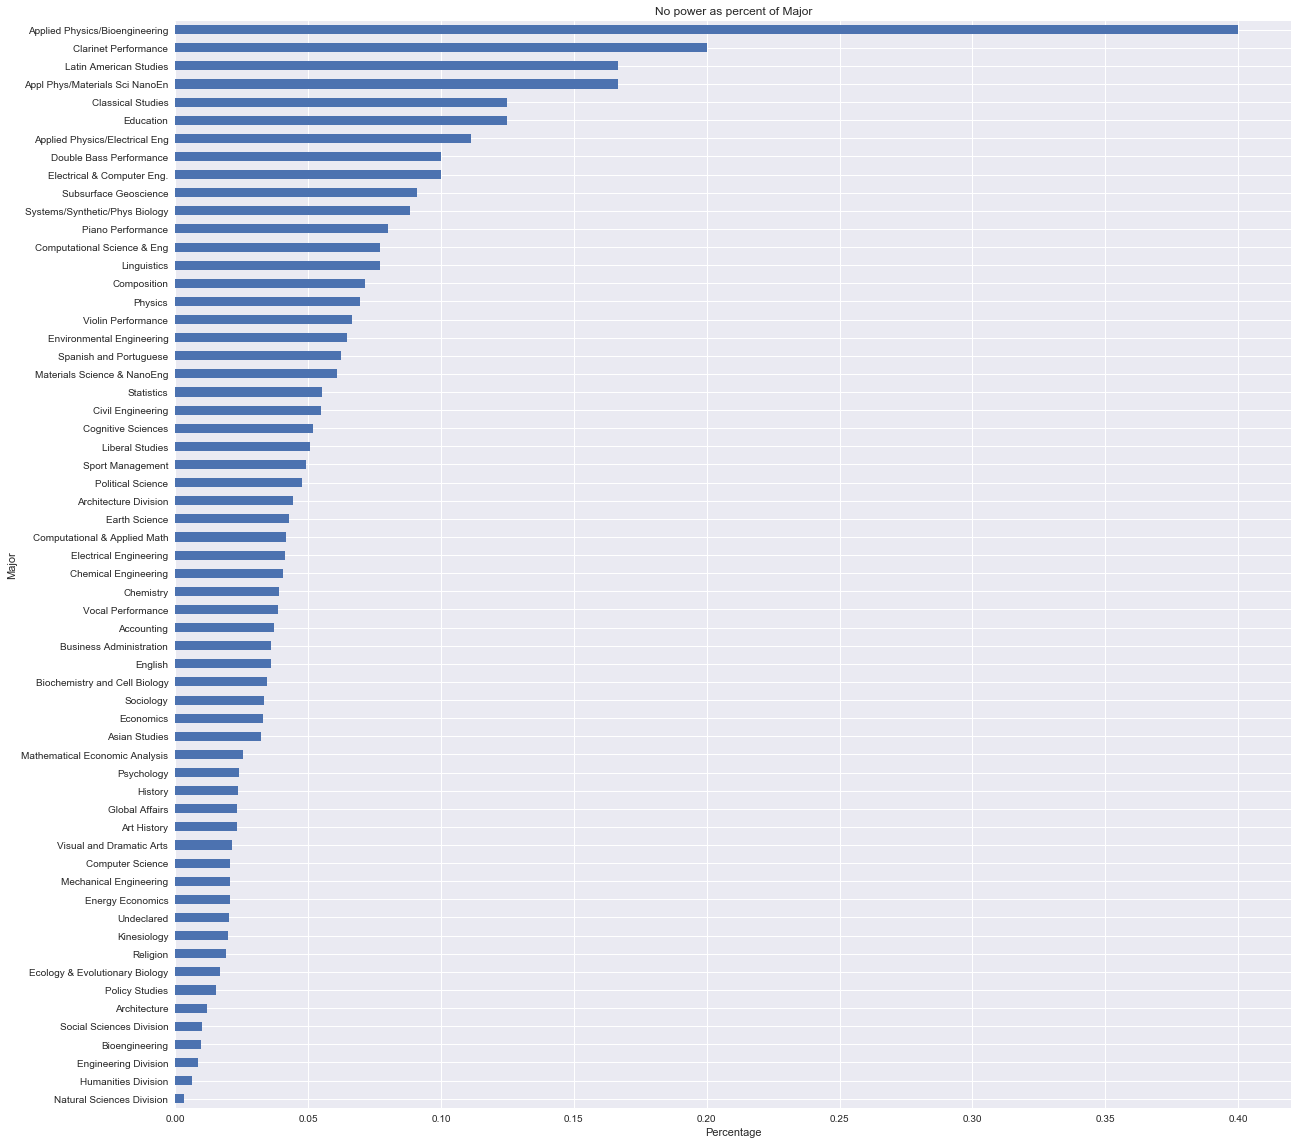

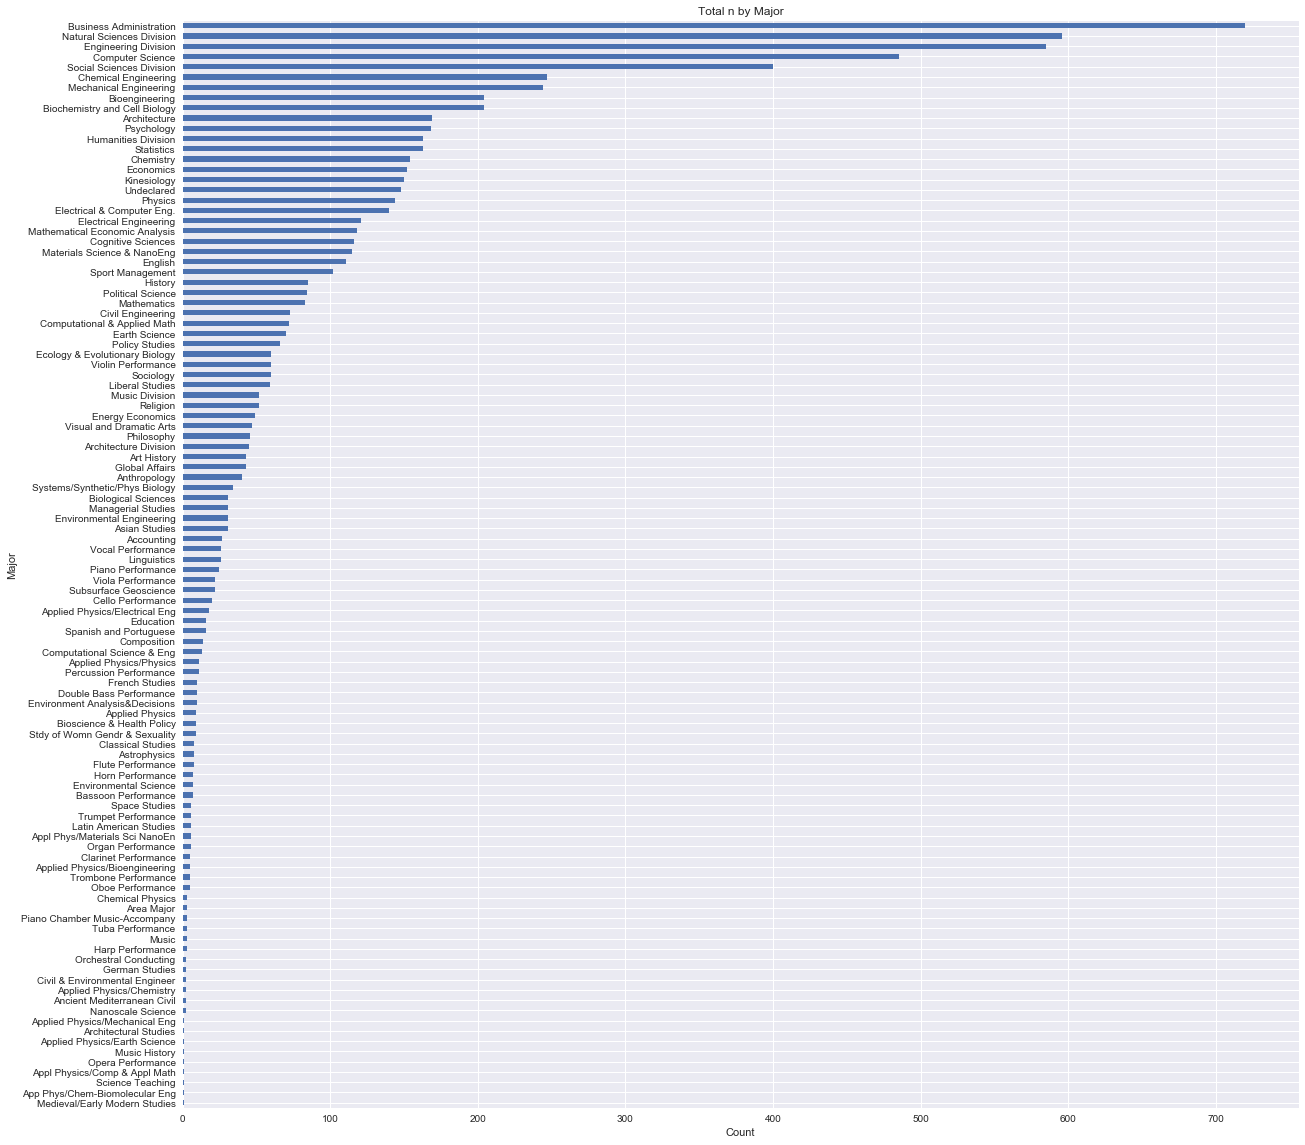

In [33]:
find_percentages('Major', merge_df)

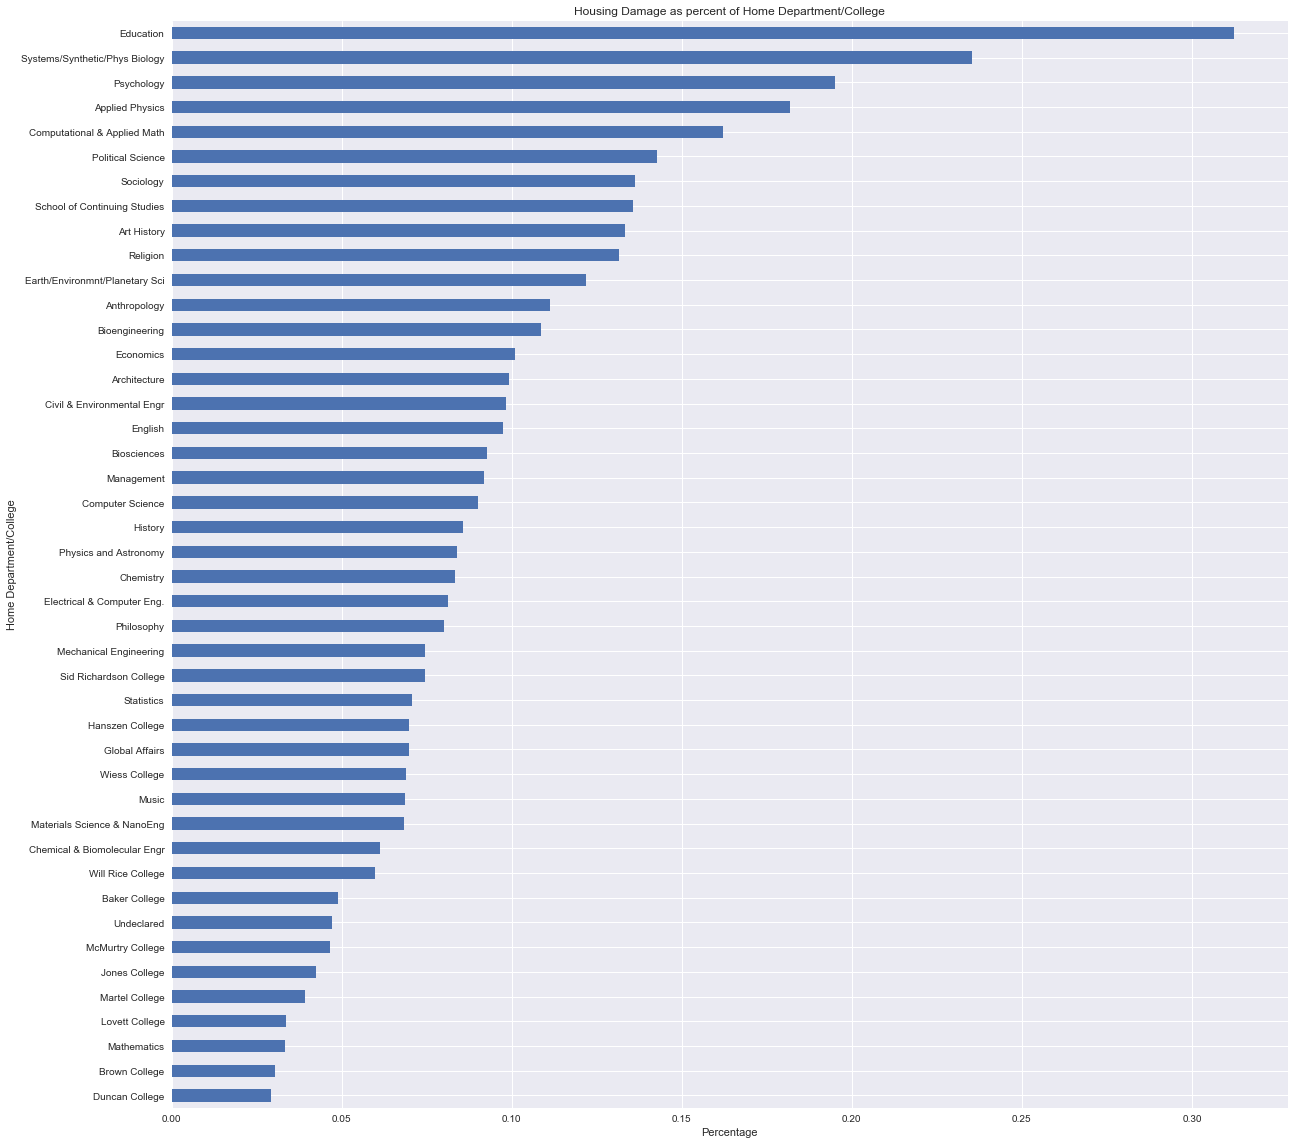

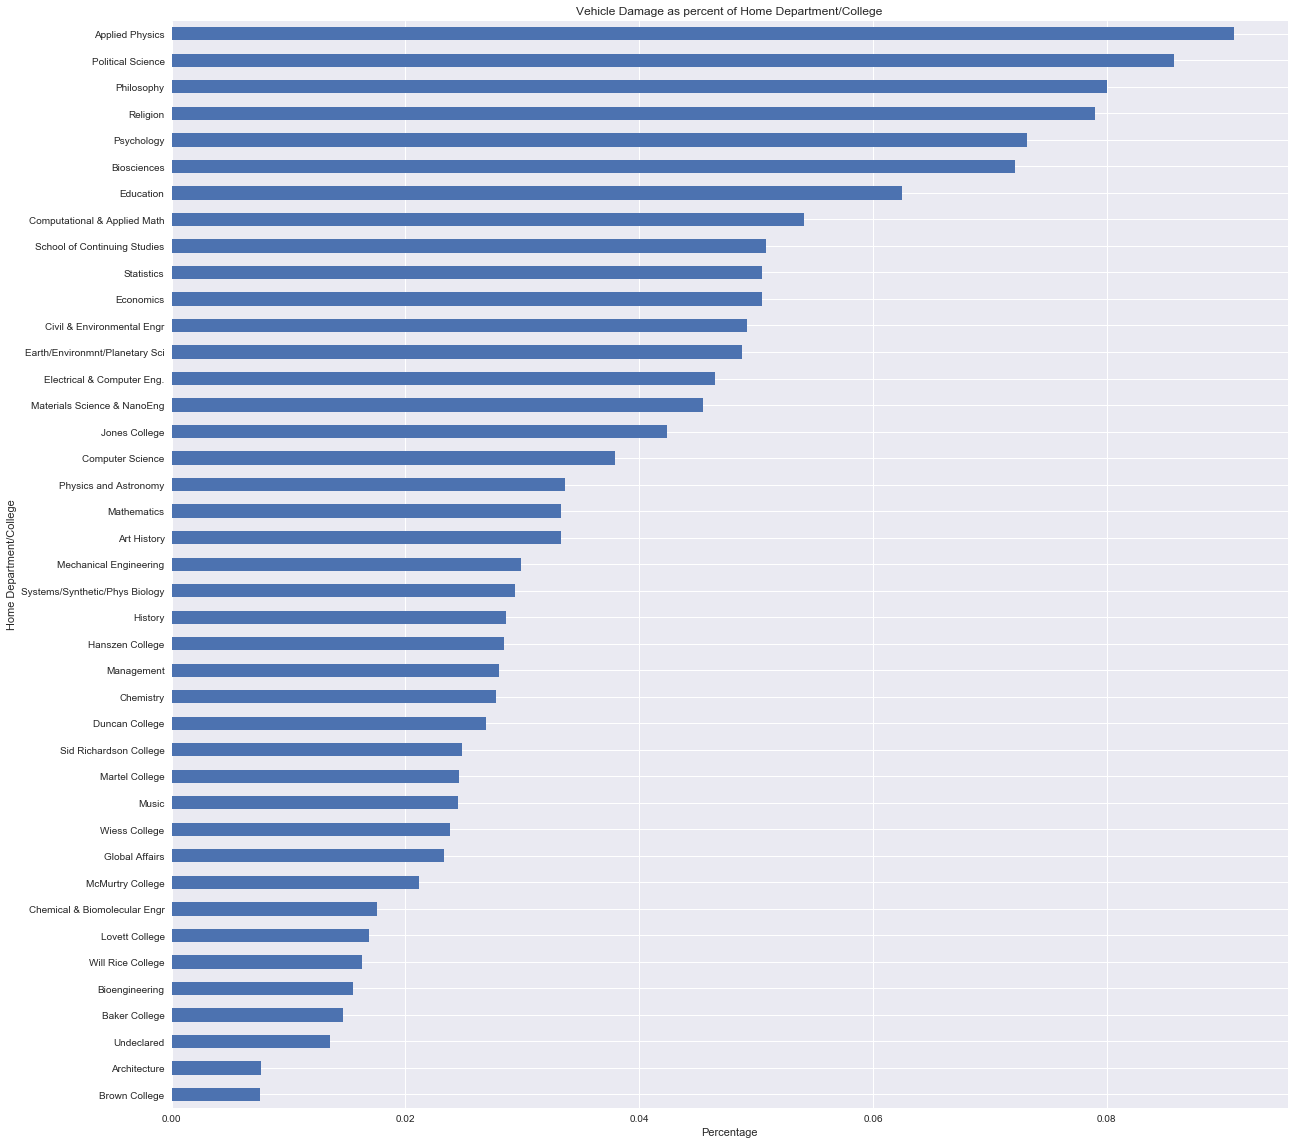

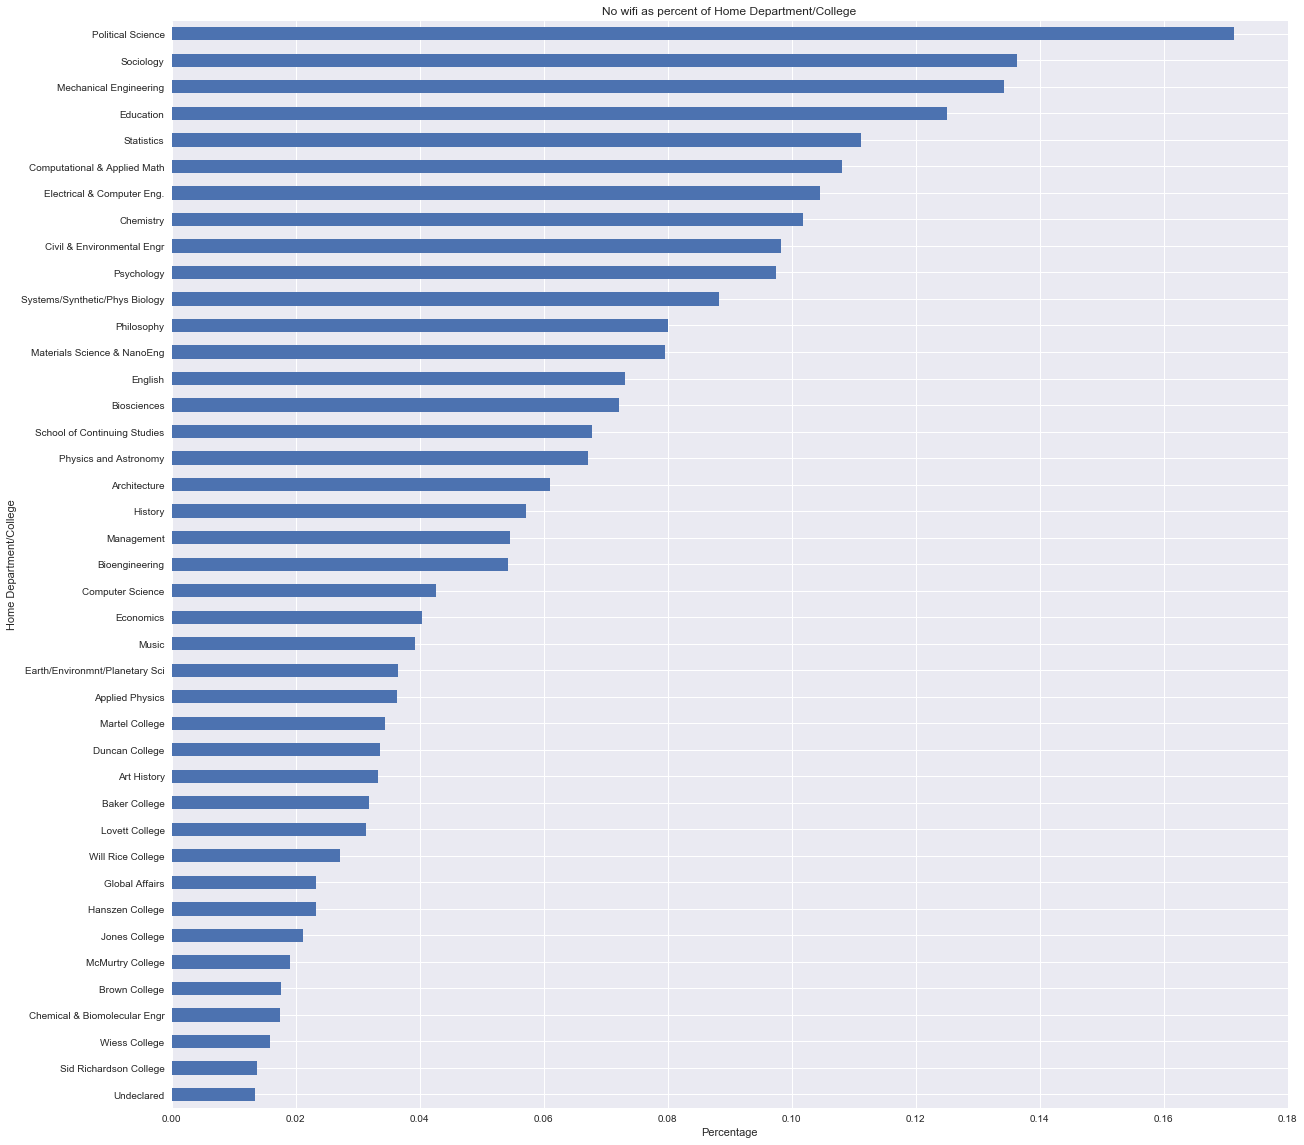

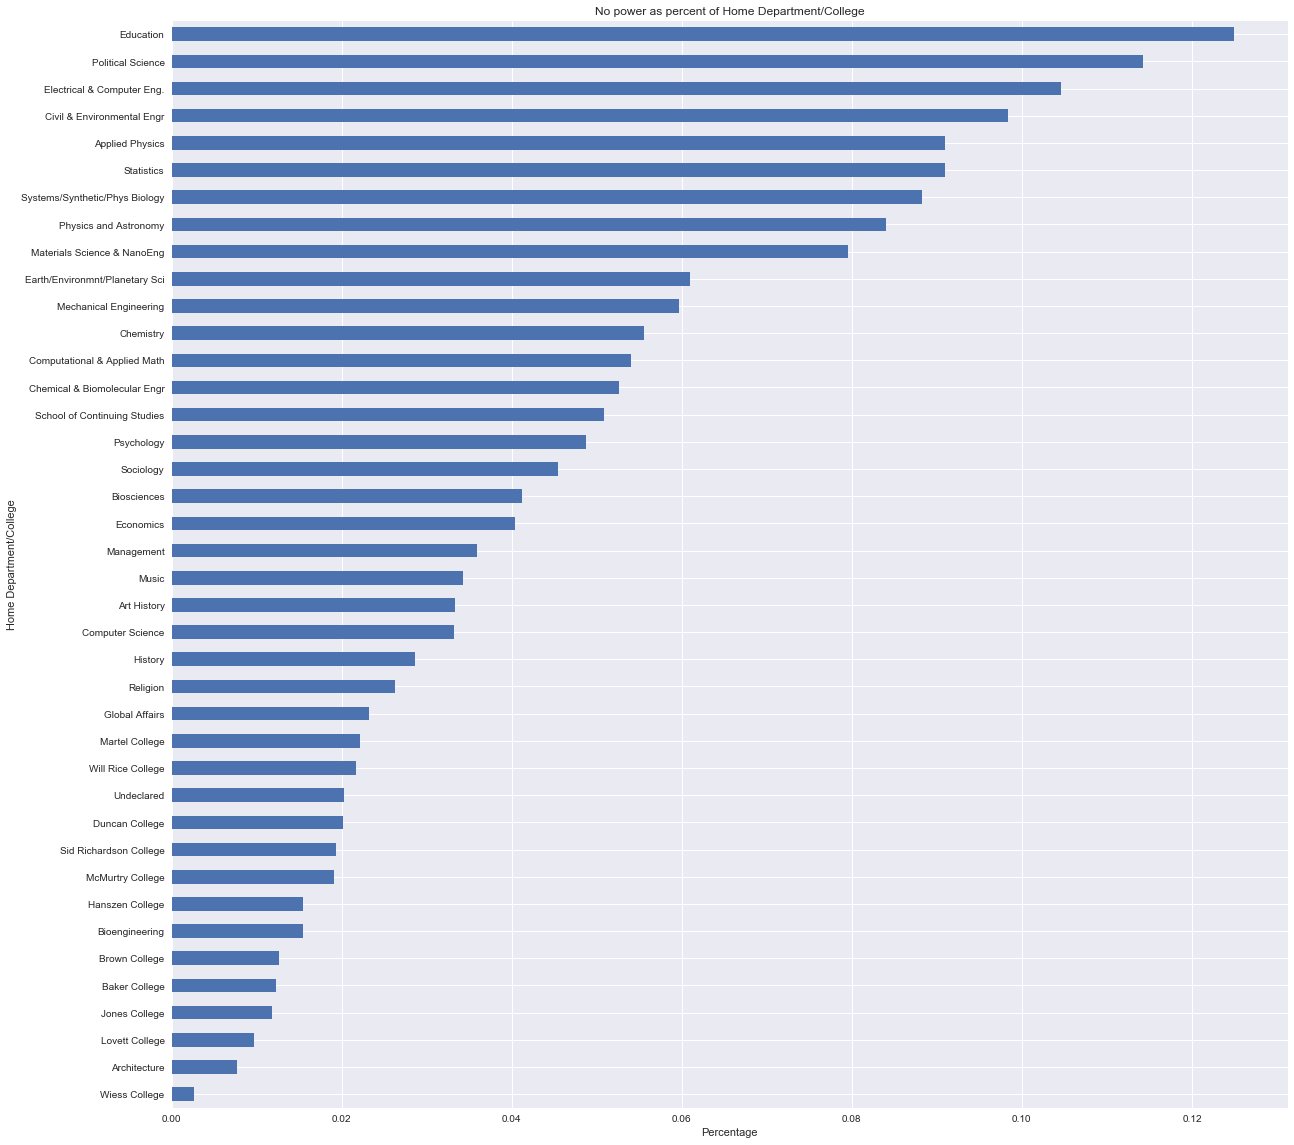

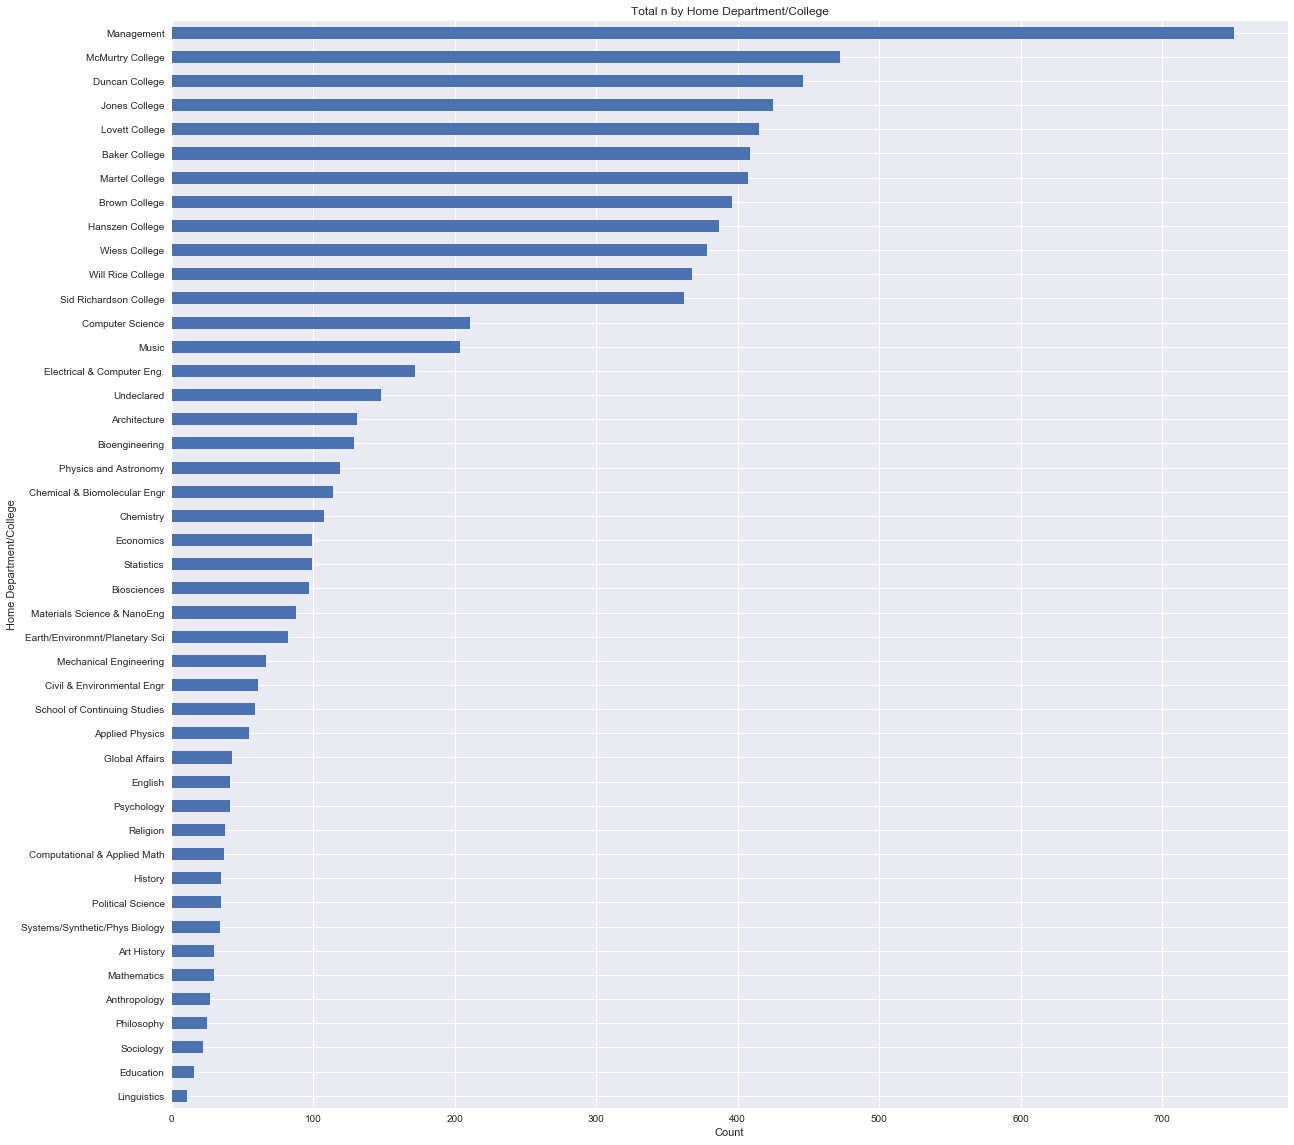

In [34]:
find_percentages('Home Department/College', merge_df)

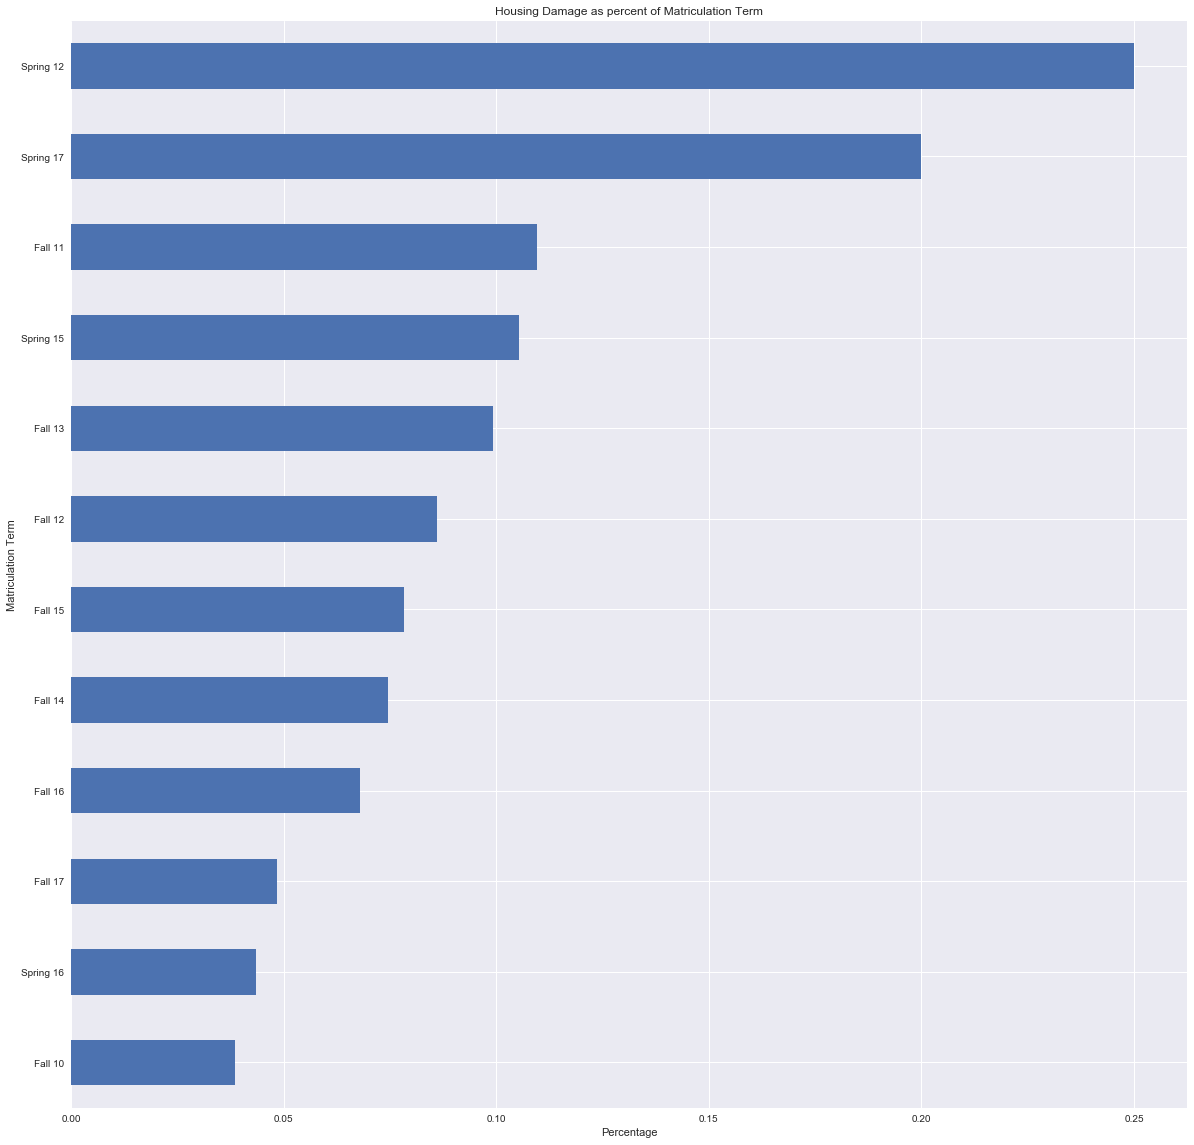

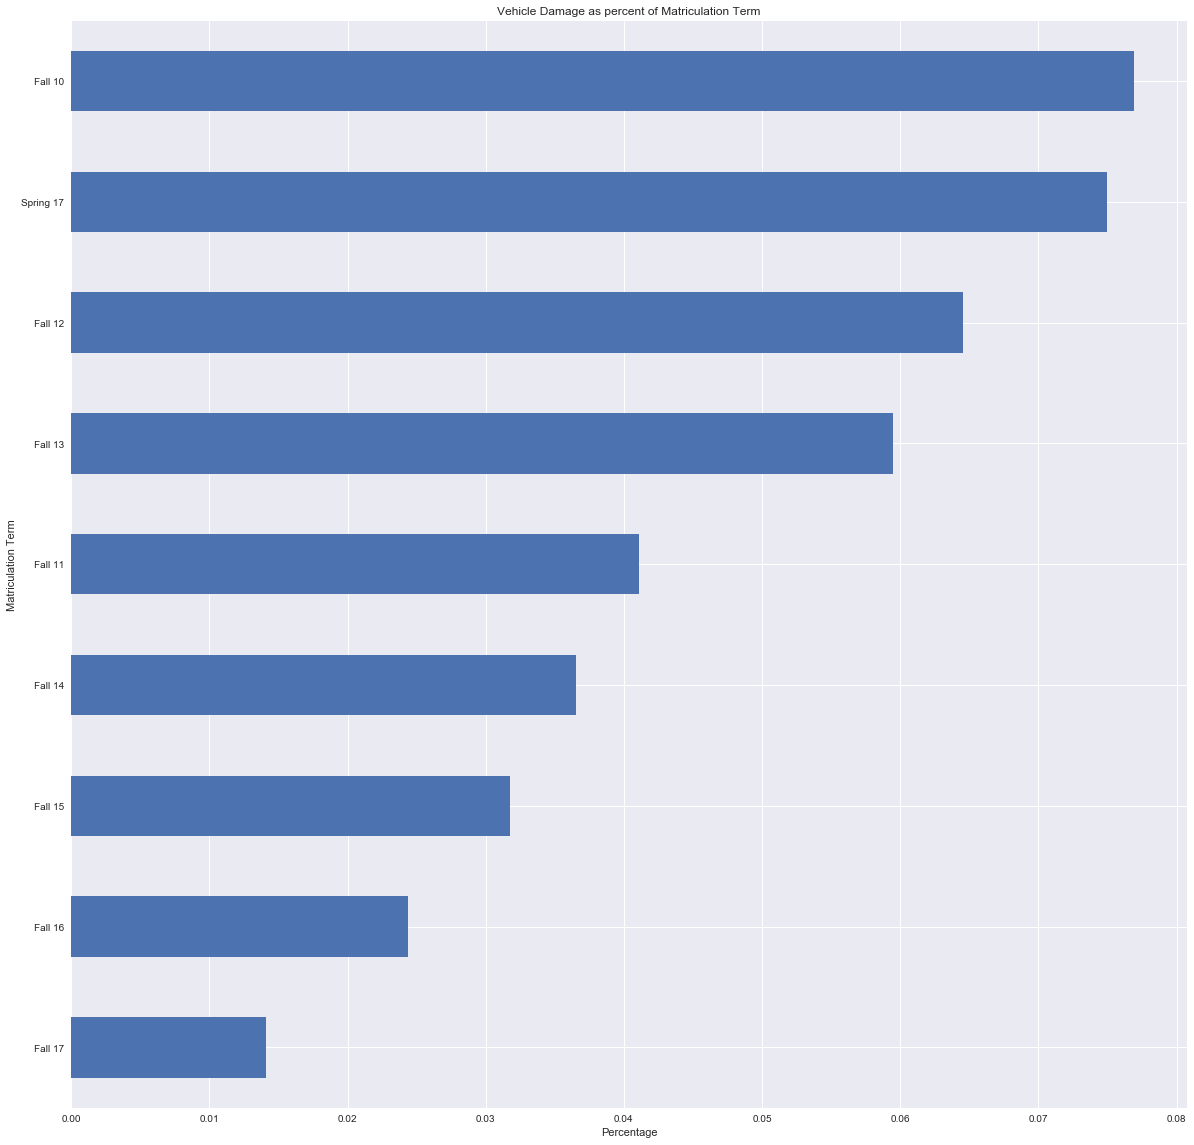

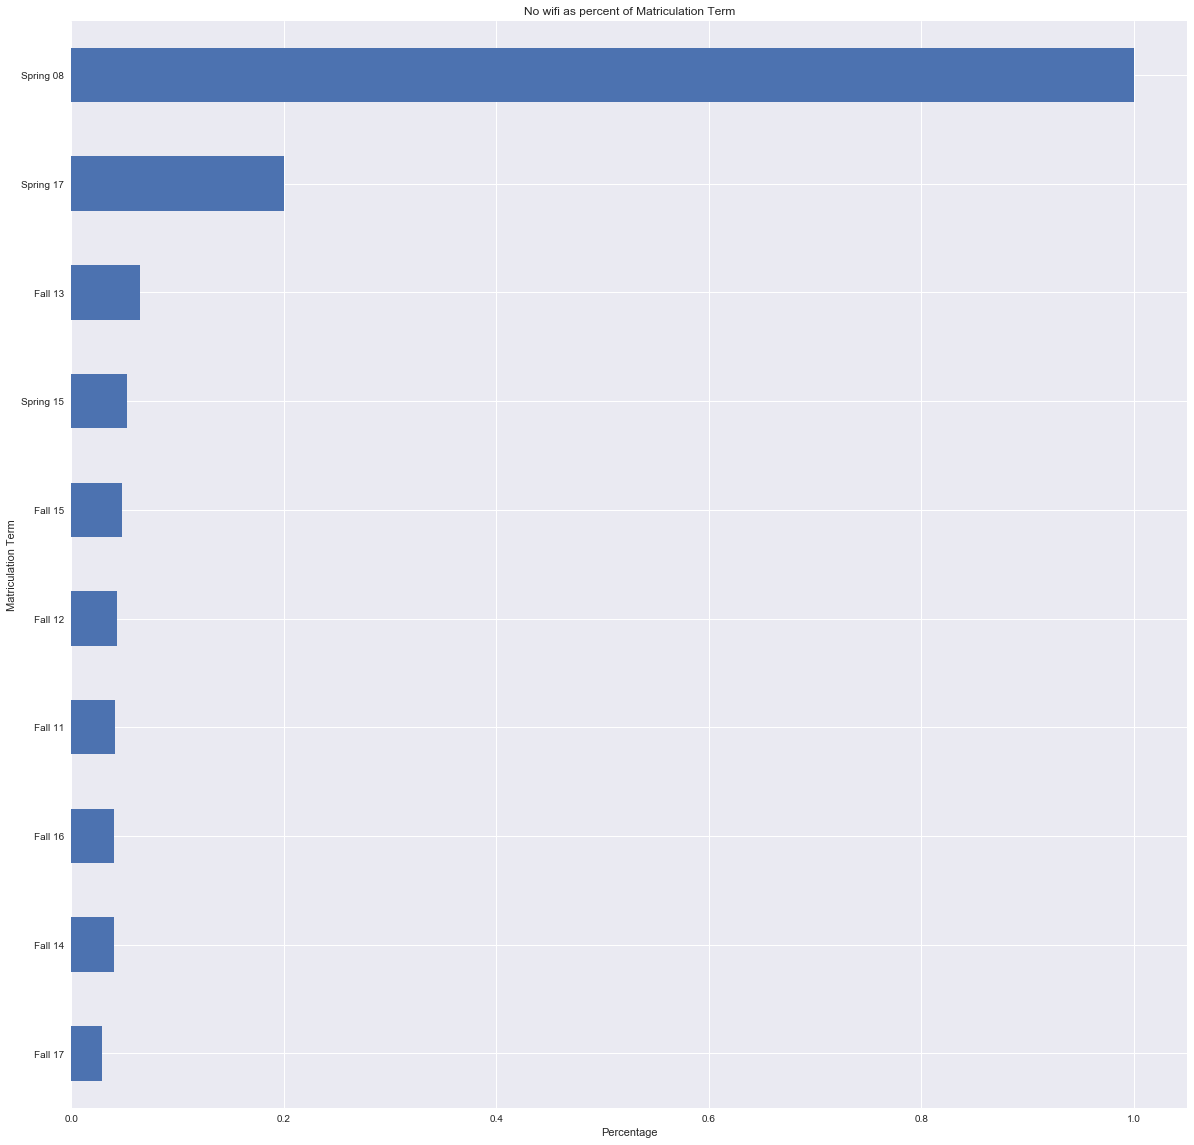

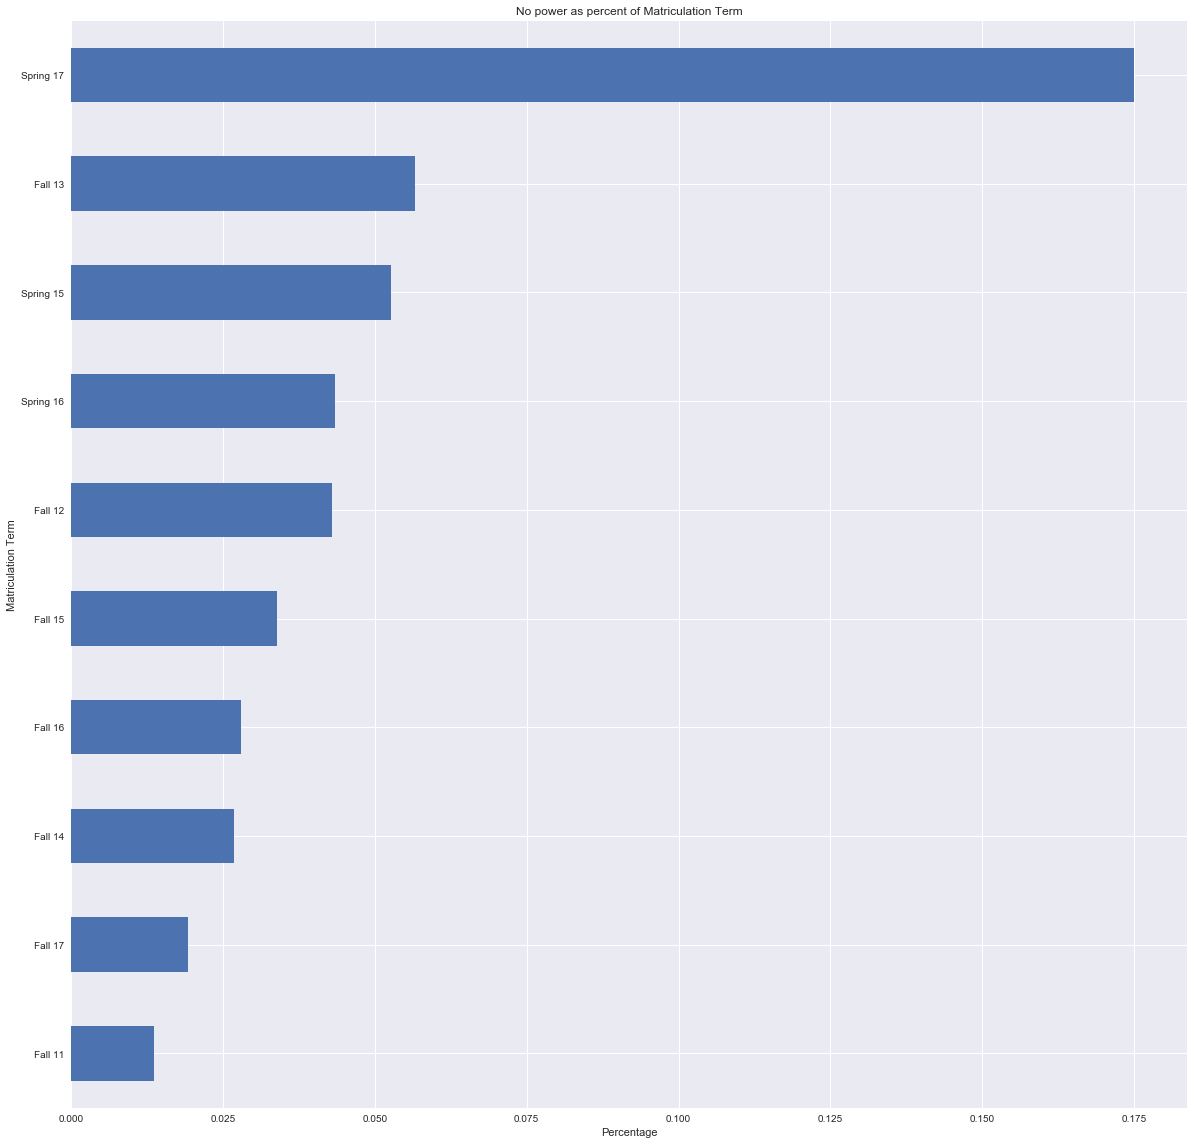

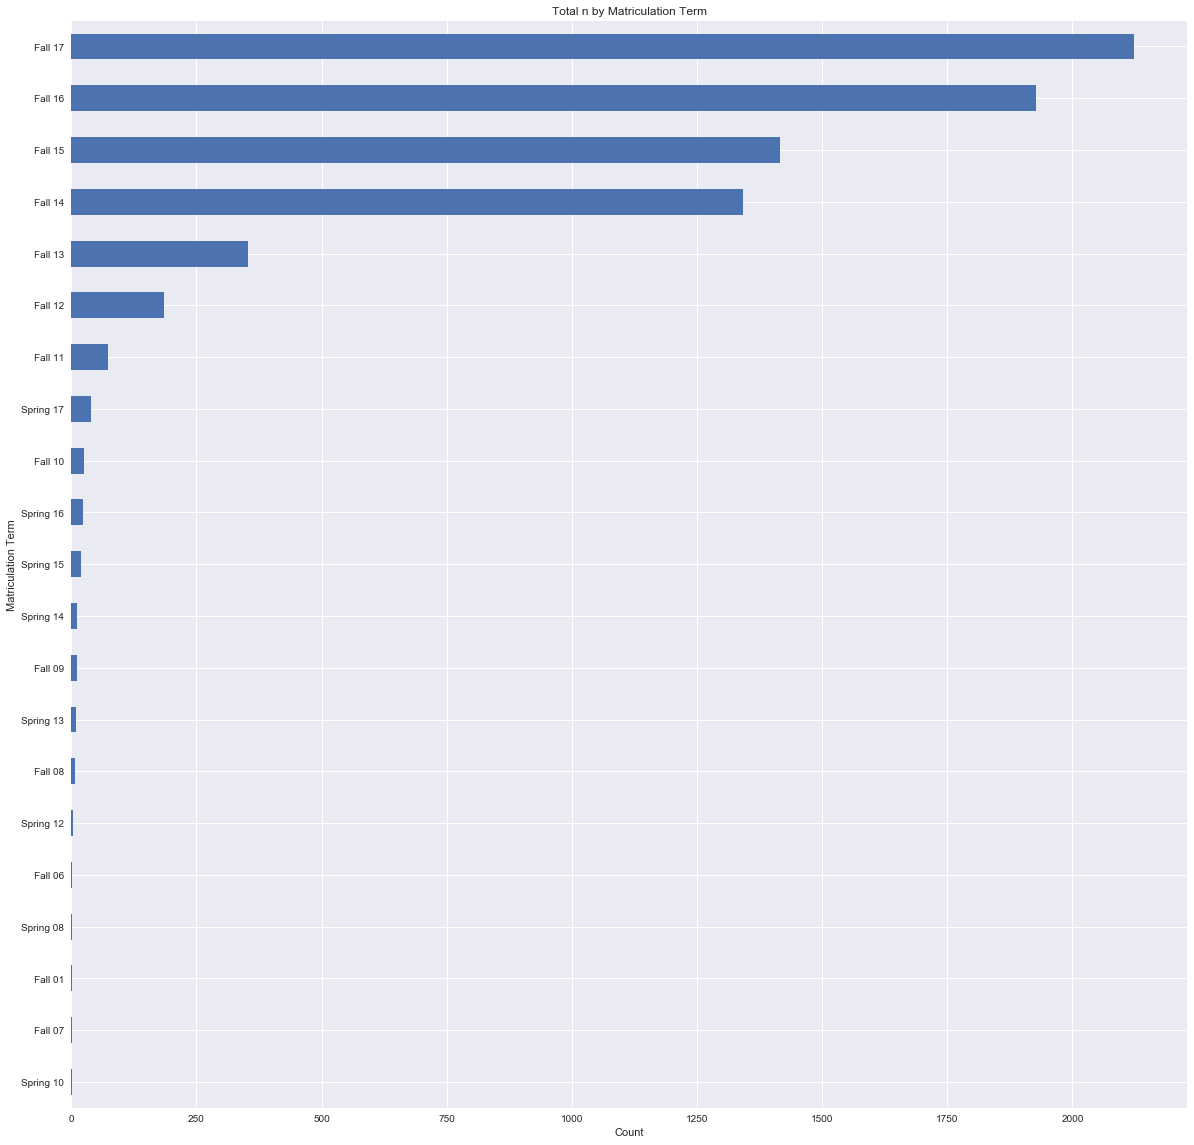

In [35]:
find_percentages('Matriculation Term'
                , merge_df)

In [54]:
# Plot histogram

import seaborn as sns
data = merge_df['Major'].value_counts().to_frame().reset_index()
data.columns = ['Major', 'Count']

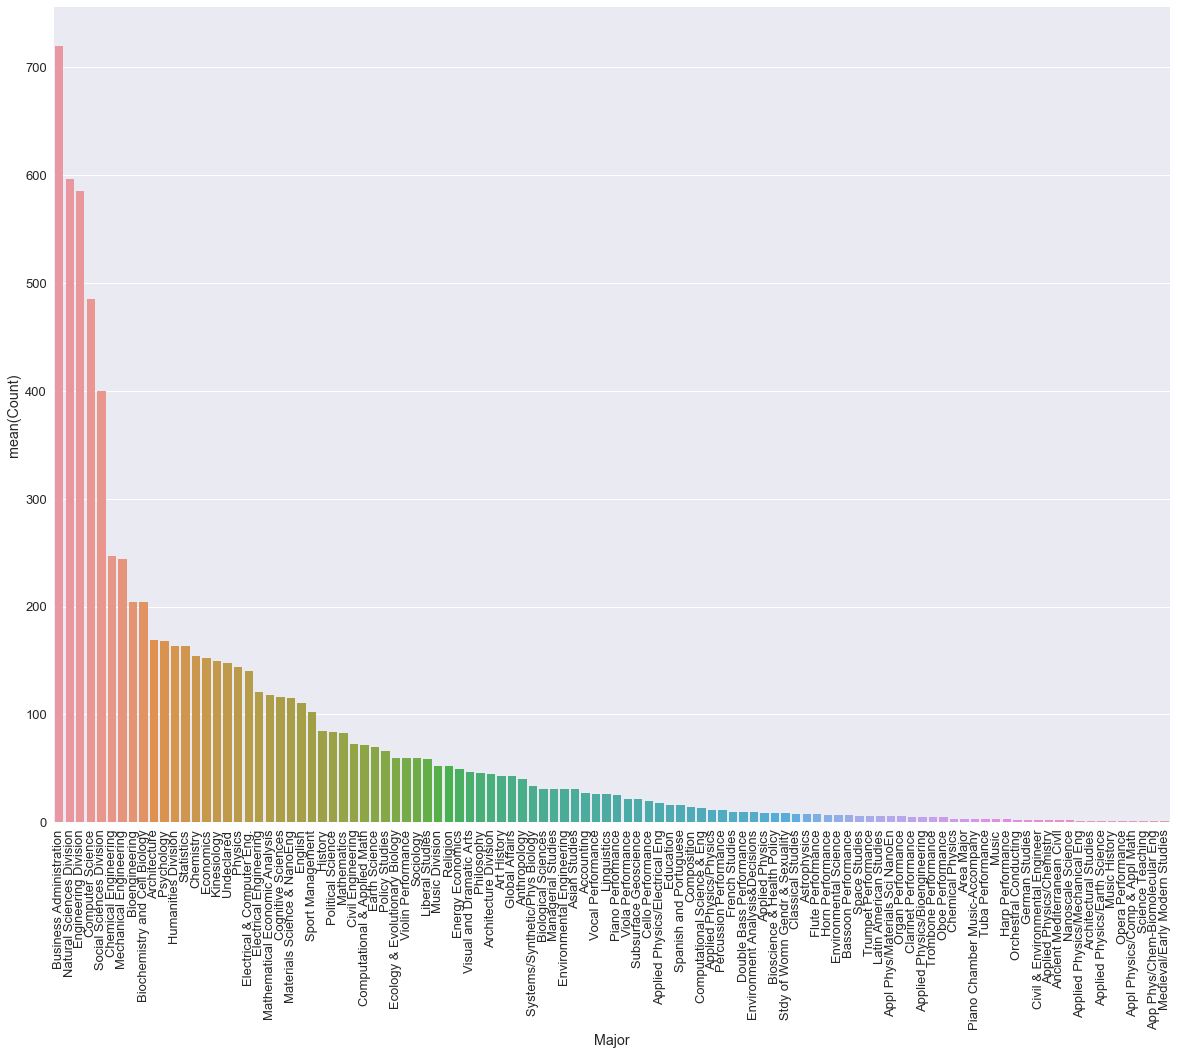

In [55]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.3)
sns.barplot(x='Major', y=data['Count'], data=data)
plt.xticks(rotation=90)
plt.show()

In [64]:
key_words = ['registration', 'transcript', 'verification', 'diploma', 'graduation', 'degree', 'record', 'waitlist', 'wait-list', 'wait list', 'schedule']

relevant_responses = []
for info in merge_df['ADDL_INFORMATION'].dropna().values:
    stuff = [keyword for keyword in key_words if keyword in info]
    if len(stuff) > 0:
        relevant_responses.append(info)
relevant_responses


['Travel within Pearland and to any other parts of the Houston area are essentially non-existent given the degree of flooding. This includes both local roads and major highways to other areas.',
 "I was out of town before the storm hit and I am not sure when I will be able to return to Houston. Hobby airport is closed until at least Friday and I understand many of the highways are still impassable. My flight to Houston was re-scheduled for Monday (9/4) so hopefully I'll be able to return to the city at that time.",
 'I have not been able to speak to my advisor nor financial aid to inquire about my schedule or missed assignments.',
 "I came to America from China on Aug. 27th. Because of Harvey, I get stuck in Dallas. My department  told me before that the deadline for registration is Sept. 1st and I may miss it. Hope it won't cause too much trouble.",
 'I am an international student from Hong Kong. I originally decided to come on 30th Aug. but is planning to defer my schedule for safety